In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
df = pd.read_csv('weight-height.csv')
print(df.head())

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


In [18]:
# df[df.isnull().any(axis=1)]
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [19]:
df["Gender"] = np.where(df["Gender"].str.contains("Male"), 0, 1)

In [20]:
X = df.drop(columns=["Height"], axis=1)
y = df["Height"]


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
# Remove Correlated Features

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.85)

X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train,X_test

import pickle

pickle.dump(sc, open('scaler.pkl', 'wb'))

In [24]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV()

ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

print(y_pred)

[68.30881209 70.03052848 66.95522207 ... 62.23658411 67.34830543
 66.07873009]


In [25]:
print(f"Model Coefficient: {ridge.coef_}")
print(f"Model Intercept: {ridge.intercept_}")

Model Coefficient: [0.49812347 3.94778263]
Model Intercept: 66.34834766149207


In [26]:
from sklearn.metrics import mean_squared_error,r2_score

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Accuracy Score: {r2_score(y_test, y_pred)}")


Mean Squared Error: 2.0609356506597862
Accuracy Score: 0.8616945817153969


In [27]:
print(f"Height of a Female with weight 245: {ridge.predict(sc.transform([[1, 245]]))}")

print(f"Height of a Male with weight 186: {ridge.predict(sc.transform([[0, 186]]))}")

Height of a Female with weight 245: [77.1710902]
Height of a Male with weight 186: [68.90098152]


/Users/mac/Desktop/MLOps/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/mac/Desktop/MLOps/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [28]:
import pickle

pickle.dump(ridge, open("height_ridge_model.pkl", "wb"))

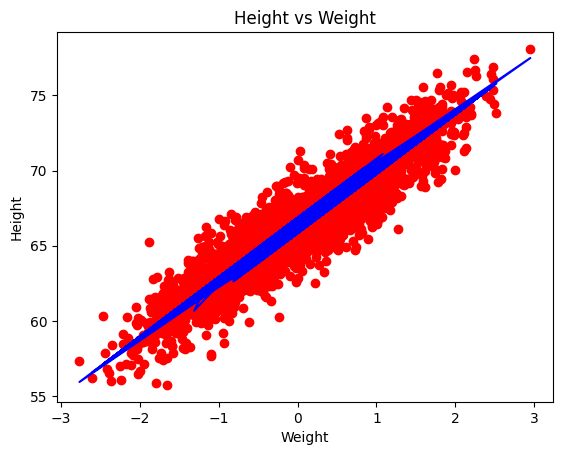

In [29]:
# bestfit line

plt.scatter(X_test[:, 1], y_test, color='red')
plt.plot(X_test[:, 1], y_pred, color='blue')
plt.title('Height vs Weight')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()